# Simulating Gaussian Beam Transverse Electric and Magnetic Waves $$(TEM_{mn})$$
### Written by Benjamin E. Hogan (All code is orginal)

### Mathmatics & Physics Citations:
1. Gretarsson, Andri M. A First Course in Laboratory Optics. Cambridge University Press, 2021. 
2. Qing Hua Wang, Jing Qi, Yun Jing Ji, Yang Song, Zhenhua Li, "Simulation with Python on transverse modes of the symmetric confocal resonator," Proc. SPIE 10452, 14th Conference on Education and Training in Optics and Photonics: ETOP 2017, 104525U (16 August 2017); https://doi.org/10.1117/12.2269884

### Other Considerations:
1. “Gaussian Beam.” Wikipedia, Wikimedia Foundation, 14 Jan. 2023, https://en.wikipedia.org/wiki/Gaussian_beam. 
2. Chat.openai.com. https://chat.openai.com/. 

#### Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Creating a object class of the laserbeam

In [2]:
class LaserBeam:
    def __init__(self, wavelength, beam_width, length):
        self.wavelength = wavelength
        self.beam_width = beam_width
        self.length = length

    def w_0(self):
        return np.sqrt(self.length * self.wavelength / (2 * np.pi))

    def wz(self, z):
        return np.sqrt(1 + (2 * z / self.length)**2) * self.w_0()

    def hermite(self, x, n):
        w_z = self.wz(0)
        if n == 0:
            return 1
        elif n == 1:
            return 2 * ((np.sqrt(2) / w_z) * x) #hermite polynomial is diffrent than the standard as the x term has a coeff
        else:
            return 2 * ((np.sqrt(2) / w_z) * x) * self.hermite(x, n-1) - 2 * (n - 1) * self.hermite(x, n-2)

    def intensity(self, x, y, I_0, m, n):
        w_0 = self.w_0()
        w_z = self.wz(0)
        return I_0 * (w_0**2 / w_z**2) * self.hermite(x, m)**2 * self.hermite(y, n)**2 * np.exp(- (x**2 + y**2) / (w_z / np.sqrt(2))**2)


#### Setting Conditions, Calculations, & Plotting

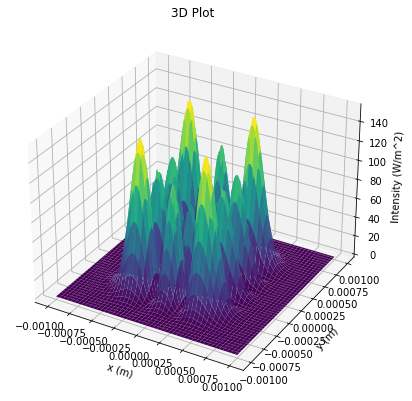

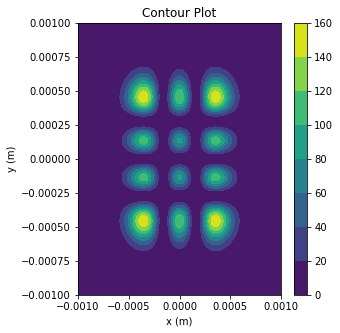

In [4]:
# Define the laser beam
wavelength = 632.8e-9  # wavelength in meters (HeNe laser)
beam_width = 3e-6     # beam width in meters (diameter)
length = 1          # Cavity Length
laser = LaserBeam(wavelength, beam_width, length)

# Define the range of x and y values to plot
x = np.linspace(-1e-3, 1e-3, 1001)
y = np.linspace(-1e-3, 1e-3, 1001)

# Hermite Polynomial intergers (Changable)

n = 3 #nth order hermite polynomial index

m = 2 #mth order hermite polynomial index

# Calculate the intensity at each (x, y) point
X, Y = np.meshgrid(x, y)
Z = laser.intensity(X, Y, 1, m, n ) # Laser intentsity 

# Plot the intensity in 3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('Intensity (W/m^2)')
ax.set_title('3D Plot')
plt.savefig(f'3D Plot (TEM_{m}{n}).png')
plt.show

# Plot the intensity as a contour map
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,2,2)
cp = ax.contourf(X, Y, Z, cmap='viridis')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Contour Plot')
fig.colorbar(cp)

plt.savefig(f'Countor Plot (TEM_{m}{n}).png')
plt.show()

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider

def plot_intensity(length, m, n):
    laser = LaserBeam(632.8e-9, 1e-3, length)

    x = np.linspace(-2e-3, 2e-3, 1001)
    y = np.linspace(-2e-3, 2e-3, 1001)
    X, Y = np.meshgrid(x, y)
    Z = laser.intensity(X, Y, 1, m, n)

    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('Intensity (W/m^2)')
    ax.set_title(f'3D Plot: m={m}, n={n}')
    
    plt.show()

interact(plot_intensity,
         length=FloatSlider(min=0.01, max=10.01, step=1, value=1.01, description= 'Length'),
         m=FloatSlider(min=0, max=10, step=1, value=0, description='m'),
         n=FloatSlider(min=0, max=10, step=1, value=0, description='n'))


interactive(children=(FloatSlider(value=1.01, description='Length', max=10.01, min=0.01, step=1.0), FloatSlide…

<function __main__.plot_intensity(length, m, n)>

NameError: name 'animation' is not defined

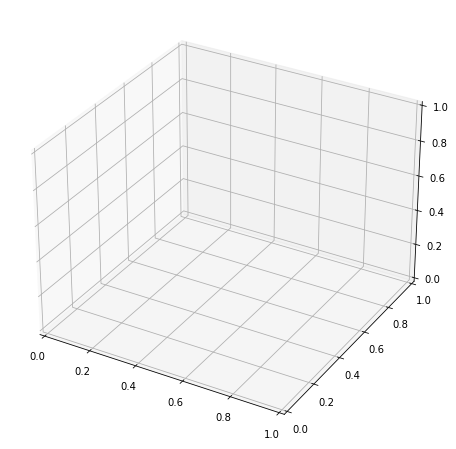

In [5]:
# Define the laser beam
wavelength = 632.8e-9  # wavelength in meters (HeNe laser)
beam_width = 3e-6     # beam width in meters (diameter)
length = 1            # Cavity Length
laser = LaserBeam(wavelength, beam_width, length)

# Define the range of x and y values to plot
x = np.linspace(-1e-3, 1e-3, 1001)
y = np.linspace(-1e-3, 1e-3, 1001)

# Set up the figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the initial values of n and m
n = 0
m = 0

# Define a function to update the plot with the current n and m values
def update_plot(frame):
    global n, m
    n = frame % 12
    m = (frame // 12) % 12
    
    # Calculate the intensity at each (x, y) point
    X, Y = np.meshgrid(x, y)
    Z = laser.intensity(X, Y, 1, m, n)
    
    # Update the plot
    ax.clear()
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('Intensity (W/m^2)')
    ax.set_title(f'n = {n}, m = {m}')
    
    return ax,

# Animate the plot
anim = animation.FuncAnimation(fig, update_plot, frames=121, interval=100, blit=False)

# Display the animation
plt.show()


writergif = animation.PillowWriter(fps=30)
anim.save('filename.gif',writer=writergif)

In [30]:
anim

In [ ]:
conda install ffmpep